# Monte Carlo Integration in 1 Dimension #
This notebook will give a brief introduction to one dimensional numerical integration, comparing two naïve methods:
  * Riemann Sum
  * Monte Carlo integration with uniform sampling
 

## Riemann sum ##
The Riemann sum is perhaps the simplest and most intuitive numerical integration scheme. You want to integrate a function on an interval of length $x$. Divide your interval into $N$ sub-intervals of equal length $\Delta x = L/N$. Evaluate the function in the middle of each sub-interval. The contribution to the total area from a sub-inteval with midpoint $x_i$ is then $f(x_i) \Delta x$, and the total value of the integral is
$$
\Delta x\sum_{i=1}^{N} f(x_i).
$$

The following block of code produces a plot which visualises the Riemann sum procedure

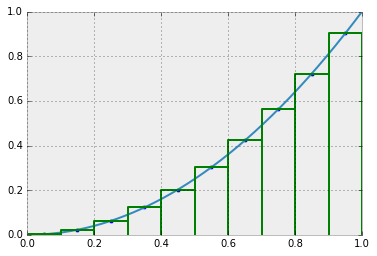

In [1]:
# Import numpy and matplotlib, and use jupyter magic to
# get plots directly in notebook
import numpy as np
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
# Get nicer looking plots than default
plt.style.use('bmh')

# Define a function to use as an example
def f(x):
    return x**2

# Clear plot and set limits
plt.clf()
start = 0
stop  = 1
plt.xlim(start, stop)
plt.ylim(start, stop)

# Plot the function to be integrated, using 1000 points
# to get a smooth curve
X = np.linspace(start, stop, 1000)
plt.plot(X, f(X))

# Draw the rectangles used in the Riemann sum
# There are N rectangles
N  = 10
# Each has width dx
dx = (stop - start)/N
# Create a vector of the midpoints of each rectangle
X  = np.linspace(start + dx/2, stop - dx/2, N)
# Draw the midpoints as circles
plt.scatter(X, f(X))
# For each rectangle, draw the borders using a line plot
for x in X:
    plt.plot([x-dx/2, x-dx/2, x+dx/2, x+dx/2], [0,f(x), f(x), 0], color = "g")

## Monte Carlo integration with uniform sampling ##
The simplest Monte Carlo integration scheme is essentially very similar to the Riemann sum method, except that the points where the function is to be evaluated are selected at random, instead of being equally spaced. Uniform sampling means that each point has the same probability of being selected. More advanced versions of Monte Carlo integration can for example use denser sampling in areas where the function value changes rapidly (*i.e.*, where the derivative of the function is large).

For a large number of random points, the integral obtained by the Monte Carlo method will approach the true value of the integral.

The following block of code produces a plot which visualises this Monte Carlo integration method.

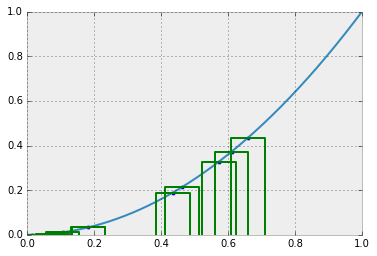

In [2]:
# These lines import the numpy library, set up matplotlib
# to be used directly in the notebook
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Define a function to use as an example
def f(x):
    return x**2

# Clear plot and set limits
plt.clf()
start = 0
stop  = 1
plt.xlim(start, stop)
plt.ylim(start, stop)

# Plot the function to be integrated, using 1000 points
# to get a smooth curve
X = np.linspace(start, stop, 1000)
plt.plot(X, f(X))

# Draw the rectangles used in the Monte Carlo method
# There are N rectangles
N  = 10
# Each has width dx
dx = (stop - start)/N
# Create a vector of the midpoints of each rectangle,
# using uniform random numbers from the function np.random.random()
# This function returns numbers on the interval [0, 1).
# We scale the numbers to the interval [start, stop) by multiplying
# with the length of the interval, and adding the start point
# You can easily convince yourself that this works by confirming that
# 0 maps to start and 1 to stop.
X  = np.random.random(N)*(stop - start) + start
# Draw the midpoints as circles
plt.scatter(X, f(X))
# For each rectangle, draw the borders using a line plot
for x in X:
    plt.plot([x-dx/2, x-dx/2, x+dx/2, x+dx/2], [0,f(x), f(x), 0], color = "g")

## Defining functions for numerical integration ##
Next, we will define two functions for carrying out numerical integration using the Riemann sum, and the Monte Carlo method with uniform sampling. We will use the fact that in Python, it is possible to send a function as an argument to another function, in order to make general integrators that can be used on any function of one variable.

### Riemann sum ###

In [3]:
# The arguments to this function are:
#   f, the function to be integrated. Must take one argument only
#   N, the number of points to evaluate the function on
#   start, the start of the integration interval
#   stop, the end of the integration interval
def riemannSum(f, N, start, stop):
    # The width of each rectangle
    dx = (stop - start) / N
    # Array with the midpoint of each rectangle
    X = np.linspace(start + dx/2, stop - dx/2, N)
    # When f(x) is applied to an array, it returns an array 
    # of equal size, holding the result of applying the function
    # to each element of the original array. We take the sum 
    # of the resulting array, and multiply by dx
    return sum(f(X))*dx

### Monte Carlo ###

In [4]:
# The arguments to this function are:
#   f, the function to be integrated. Must take one argument only
#   N, the number of points to evaluate the function on
#   start, the start of the integration interval
#   stop, the end of the integration interval
def monteCarloIntegration(f, N, start, stop):
    # The width of each rectangle
    dx = (stop - start) / N
    # Array with the midpoint of each rectangle, from uniform random numbers
    R = np.random.random(N)*(stop - start) + start
    # When f(x) is applied to an array, it returns an array 
    # of equal size, holding the result of applying the function
    # to each element of the original array. We take the sum 
    # of the resulting array, and multiply by dx
    return sum(f(R))*dx

## Application 1 ##
Here, we will apply our two different integration schemes to calculate the simple integral
$$ \int_0^1 x^2 \;\mathrm{d}x = \frac{1}{3} $$
and compare the results. Observe that the Riemann sum generally works better for this example, *i.e.*, it gives better accuracy for the same number of function evaluations (the function is evaluated $N$ times in both cases). Note also that the Riemann sum always gives the same result, while the Monte Carlo method will fluctuate randomly. Observe how the accuracy of both increase when you increase the number of points, $N$.

In [5]:
# Simple example function
def f(x):
    return x**2

# Define the number of points and the interval
N = 1000
start = 0
stop  = 1
print('Riemann Sum: ', riemannSum(f, N, start, stop))
print('Monte Carlo: ', monteCarloIntegration(f, N, start, stop))

Riemann Sum:  0.33333325
Monte Carlo:  0.346267413597


## Application 2 ##
Why do we bother talking about Monte Carlo integration when the Riemann sum seems work better? Because this is not always the case. Here, we will look at another example, the integral
$$ \int_0^1 \sin^2 \left( 20 \cdot 2\pi x \right)\; \mathrm{d}x = \frac{1}{2}.$$

In [6]:
# Simple example function
def f(x):
    return np.sin(20*2*np.pi*x)**2

# Define the number of points and the interval
N = 40
start = 0
stop  = 1
print('Riemann Sum: ', riemannSum(f, N, start, stop))
print('Monte Carlo: ', monteCarloIntegration(f, N, start, stop))

Riemann Sum:  1.0
Monte Carlo:  0.51211304878


So what happened here? The result of the Riemann sum is 1.0, while the result of the Monte Carlo integration is at least in the right neighbourhood. The reason is that the function we looked at, $f(x) = \cos^2 ( 25\cdot 2 \pi x)$, varies between 0 and 1, and has 50 local maxima on the interval from 0 to 1. Using the Riemann sum, we sampled at 50 points, an as it happens, those 50 points are exactly the 50 maxima. Observe that changing the number of points (even to 51) gives a better answer for the Riemann method.

This is of course an example which is constructed to make the Riemann sum method perform poorly, but the principle holds. For rapidly oscillating functions, the integration will be sensitive to where you choose to sample. In these cases, Monte Carlo integration may perform better than schemes which use equally distributed function evaluations.

## Bonus ##

Here are two blocks of code which will visualise the example above.

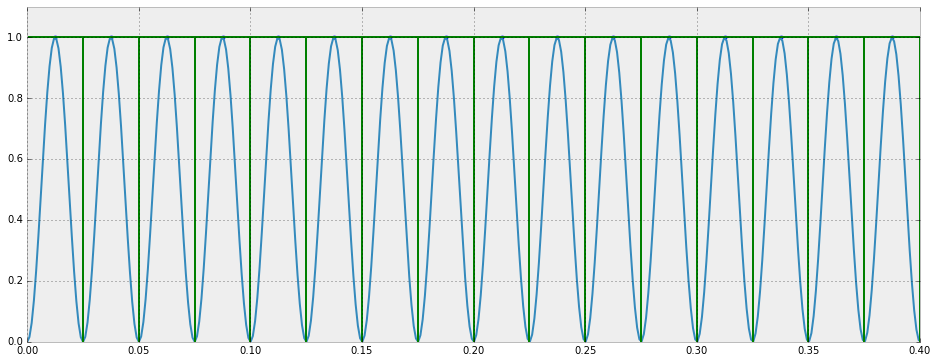

In [7]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from __future__ import division

# The function to be integrated
def f(x):
    return np.sin(20*2*np.pi*x)**2

# Clear plot and set limits and figuresize
# We plot the interval from 0 to 0.4 only to make it easier to see
plt.clf()
plt.figure(figsize = (16, 6))
plt.xlim(0, 0.4)
plt.ylim(0, 1.1)

# Plot the function to be integrated, using 1000 points
# to get a smooth curve
start = 0
stop  = 1
X = np.linspace(start, stop, 1000)
plt.plot(X, f(X))

# Draw the rectangles used in the Riemann sum
N  = 40
dx = (stop - start)/N
X  = np.linspace(start + dx/2, stop - dx/2, N)
# Draw the midpoints as circles
plt.scatter(X, f(X))
# For each rectangle, draw the borders using a line plot
for x in X:
    plt.plot([x-dx/2, x-dx/2, x+dx/2, x+dx/2], [0,f(x), f(x), 0], color = "g")

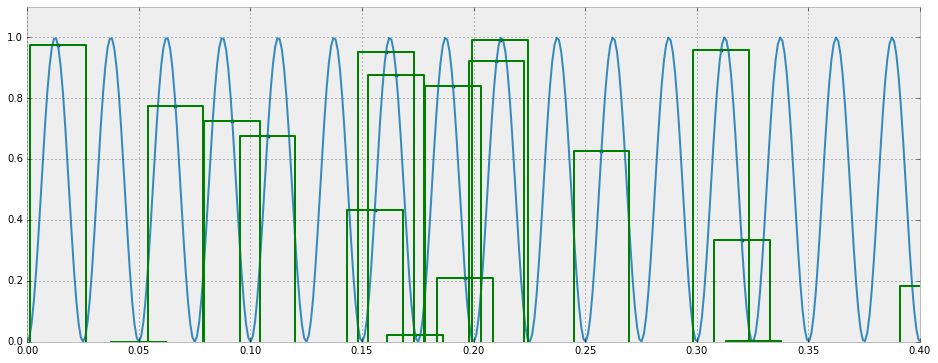

In [8]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from __future__ import division

# The function to be integrated
def f(x):
    return np.sin(20*2*np.pi*x)**2

# Clear plot and set limits and figuresize
# We plot the interval from 0 to 0.4 only to make it easier to see
plt.clf()
plt.figure(figsize = (16, 6))
plt.xlim(0, 0.4)
plt.ylim(0, 1.1)

# Plot the function to be integrated, using 1000 points
# to get a smooth curve
start = 0
stop  = 1
X = np.linspace(start, stop, 1000)
plt.plot(X, f(X))

# Draw the rectangles used in the Riemann sum
N  = 40
dx = (stop - start)/N
X  = np.random.random(N)*(stop - start) +  start
# Draw the midpoints as circles
plt.scatter(X, f(X))
# For each rectangle, draw the borders using a line plot
for x in X:
    plt.plot([x-dx/2, x-dx/2, x+dx/2, x+dx/2], [0,f(x), f(x), 0], color = "g")